## <center> Visualization of the Riemann Zeta Function</center>

[<tt>mpmath</tt>](http://mpmath.org/doc/0.19/) is a Python library for real and complex floating-point arithmetic with arbitrary precision. Among other features, <tt>mpmath</tt> implements special functions such as gamma function,  Riemann zeta function, Bessel functions, Jacobi theta functions and more.
    
In this IPython Notebook  we ilustrate how we  generated  the  domain coloring plots of the famous Riemann zeta function, posted on
[Wikipedia](http://en.wikipedia.org/wiki/Riemann_zeta_function). 

The Riemann zeta function is evaluated at the points of a grid associated to a rectangular region in the complex plane, using <tt>mpmath.zeta</tt>.
Each point is colored using  a version of the domain coloring method for visualization of complex-valued functions.

[Here](http://nbviewer.ipython.org/github/empet/Math/blob/master/DomainColoring.ipynb) are  details on how to generate domain coloring plots of the complex functions, with <tt>matplotlib</tt>  and <tt>mayavi</tt>.
    

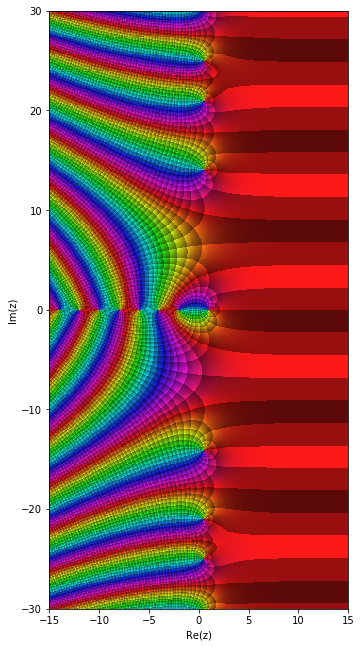

In [2]:
import matplotlib.pyplot as plt 
from mpmath import * 
from colorsys import hsv_to_rgb
%matplotlib inline
pi = 3.1415926535898

def PerFract(x, t, m, M):
    x=x/t
    return m+(M-m)*(x-floor(x)) 

def color_clines(fz):# this is the color function that replaces the 
                     #default  color function implemented in mpmath.cplot
    if isinf(fz):
        return (0, 0, 1.0)#hsv code
    if isnan(fz):
        return (0., 0., 0.5)

    n=15#n is the number of rays drawn in a cycle
    
    h = (float(arg(fz)) + pi) / (2*pi) #hue
    h = (h - 0.5) % 1.0

    Phc=PerFract(h, 1.0/n, 0.6, 1) #  set brightness between 0.6 and 1,
                                   #in order to avoid too dark colors   
    modul=fabs(fz)
    Logm=log(modul)
    s = 0.9 #saturation
      
    Modc=PerFract(Logm, 2*pi/n, 0.6, 1)
    v=Modc*Phc 
     
    return  hsv_to_rgb(h,s, v) 



plt.rcParams['figure.figsize'] = 7, 11 
cplot(zeta, re=[-15, 15], im=[-30, 30], color=color_clines, verbose=False, points=200000, \
      file='Riemann-Zeta-Func.png')


In [1]:
from IPython.display import Image

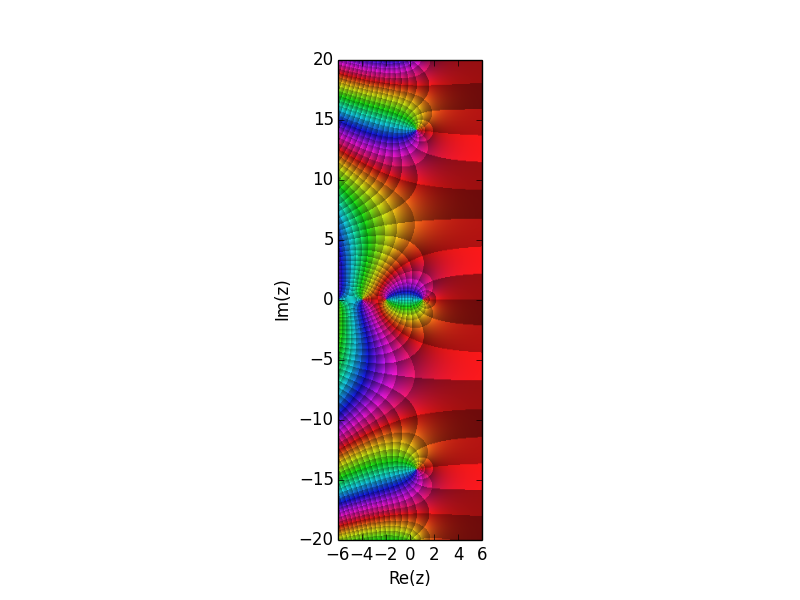

In [3]:
Image(filename='Riemann-Zeta-detail.png')#posted on wikipedia

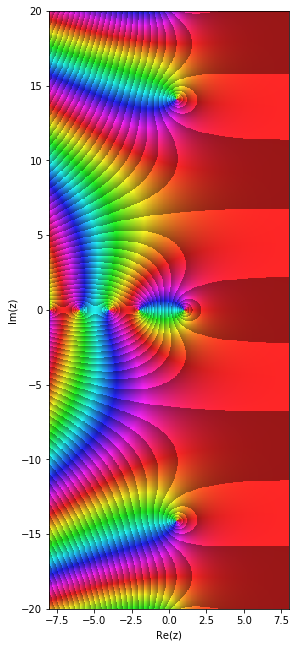

In [3]:
def color_modlines(fz):# this color function marks only modulus lines
    if isinf(fz):
        return (0, 0, 1.0)#hsv code
    if isnan(fz):
        return (0., 0., 0.5)

    n=15#n is the number of rays drawn in a cycle
    
    h = (float(arg(fz)) + pi) / (2*pi) #hue
    h = (h - 0.5) % 1.0
 
    modul=fabs(fz)
    Logm=log(modul)
    s = 0.85 #saturation
      
    v=PerFract(Logm, 2*pi/n, 0.6, 1)
   
    return  hsv_to_rgb(h, s, v) 

cplot(zeta, re=[-8, 8], im=[-20, 20], color=color_modlines, verbose=False, points=200000, \
      file='Riemann-Zeta-detail2.png')


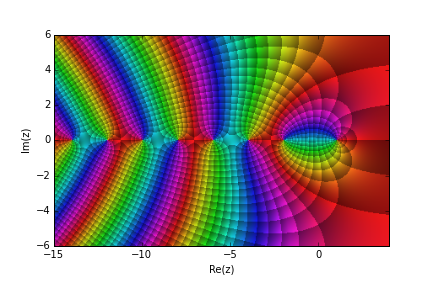

In [4]:
Image(filename='zeta-simple-zeros.png')#200000points

This Jupyter Notebook is an update of the initial one, created in 2014.

In [4]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()